In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv("gender_submission.csv")

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 觀察年齡、艙等、登船港口對於生存率的分佈

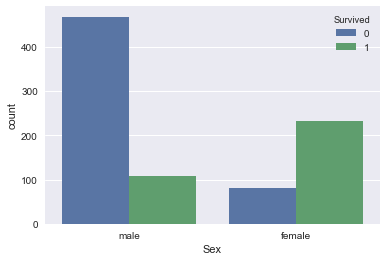

In [7]:
sns.countplot(train['Sex'], hue=train['Survived'])

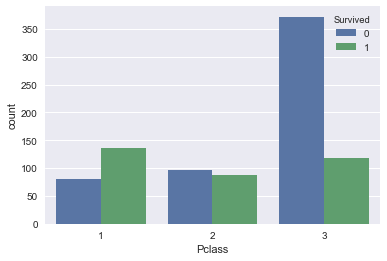

In [8]:
sns.countplot(train['Pclass'], hue=train['Survived'])

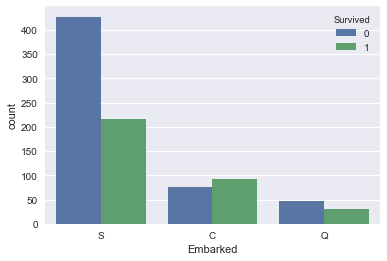

In [9]:
sns.countplot(train['Embarked'], hue=train['Survived'])

## 觀察年齡及船票價格與生存率的分佈

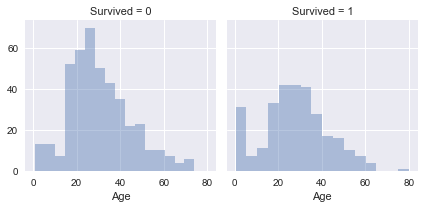

In [10]:
g = sns.FacetGrid(train, col="Survived")
g.map(sns.distplot, 'Age', kde=False)

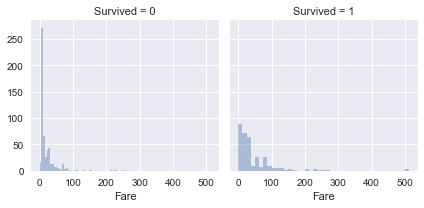

In [11]:
g = sns.FacetGrid(train, col="Survived")
g.map(sns.distplot, 'Fare', kde=False)

## 將伴侶及兄弟姊妹合併為家庭欄位 並觀察與生存率分佈

In [12]:
train["Family_Size"] = train["Parch"] + train["SibSp"]

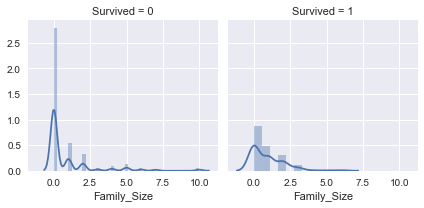

In [13]:
g = sns.FacetGrid(train, col="Survived")
g.map(sns.distplot, "Family_Size", kde="False")

## 新增頭銜欄位

In [14]:
train['Title'] = train['Name'].str.split('.',expand=True)[0].str.split(',',expand=True)[1]


In [15]:
train['Title'].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Title, dtype: object

In [16]:
train['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

## 填補價格空格 丟掉艙等欄位

In [17]:
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
train['Embarked'] = train['Embarked'].fillna('S')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Family_Size    891 non-null int64
Title          891 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ KB


In [19]:
## 填補年齡

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [21]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [22]:
train.drop('Name',1,inplace=True)

In [23]:
train.drop('Ticket',axis=1,inplace=True)

In [24]:
train.drop('Cabin',axis=1,inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,0,Mr


In [26]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
title = pd.get_dummies(train['Title'],drop_first=True)

In [27]:
train.drop(['Sex','Embarked','Title'],axis=1,inplace=True)

In [28]:
train_test = train

In [29]:
train_test = pd.concat([sex,embark],axis=1)

In [30]:
New_train = pd.concat([train,train_test],axis=1)

In [31]:
New_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1


In [32]:
## 建立模型

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [35]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_Size
0,1,3,22.0,1,0,7.2500,1
1,2,1,38.0,1,0,71.2833,1
2,3,3,26.0,0,0,7.9250,0
3,4,1,35.0,1,0,53.1000,1
4,5,3,35.0,0,0,8.0500,0
5,6,3,24.0,0,0,8.4583,0
6,7,1,54.0,0,0,51.8625,0
7,8,3,2.0,3,1,21.0750,4
8,9,3,27.0,0,2,11.1333,2
9,10,2,14.0,1,0,30.0708,1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 520 to 863
Data columns (total 7 columns):
PassengerId    623 non-null int64
Pclass         623 non-null int64
Age            623 non-null float64
SibSp          623 non-null int64
Parch          623 non-null int64
Fare           623 non-null float64
Family_Size    623 non-null int64
dtypes: float64(2), int64(5)
memory usage: 38.9 KB


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
## Evaluation

In [41]:
from sklearn.metrics import classification_report

In [49]:
predictions = logmodel.predict(test)

ValueError: could not convert string to float: 'C'

In [43]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.89      0.77       154
          1       0.73      0.41      0.53       114

avg / total       0.70      0.69      0.66       268



In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
